In [7]:
import numpy_financial as npf


In [8]:
res = npf.fv(1,20,0,-1)
print(res)

1048576.0


In [9]:
#future value = fv()


In [10]:
res = npf.pv(0.1,8,0,1000)
print(res)

-466.50738020973307


In [15]:
res = npf.pmt(0.07/12,5*12,0,100000)
print(res)

-1396.7865207016134


In [16]:
res = npf.pmt(0.20/12,10*12,0,1000000)
print(res)

-2658.900553265933


In [17]:
cashflow = [-5000, 500, 700, 1000, 3000]
print(npf.irr(cashflow))

0.012164656866492818


In [18]:
rev = [18000, 25000, 20000, 45000, 19500] 
import matplotlib.pyplot as plt


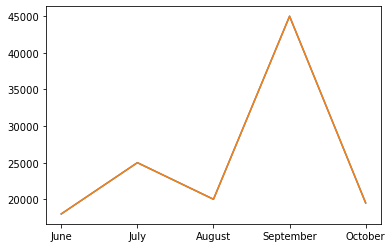

In [19]:
plt.plot(rev)
plt.savefig('plot.png')
months = ['June','July','August','September','October']

plt.plot(months,rev)

In [20]:
import pandas as pd
from pandas import *


In [21]:
res = [100.99,345.78,678.34,2001.3]
s = pd.Series(res)
print(s.describe)

<bound method NDFrame.describe of 0     100.99
1     345.78
2     678.34
3    2001.30
dtype: float64>


In [22]:
data = {'date':['2001-06-03','2000-05-20','2002-07-10','1975-06-30'],'price':[100.99,345.78,678.34,2001.3]}
df = pd.DataFrame(data)
print(df)

         date    price
0  2001-06-03   100.99
1  2000-05-20   345.78
2  2002-07-10   678.34
3  1975-06-30  2001.30


In [23]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = data[0]
df = df[['Symbol','Security']]
print(df)

    Symbol            Security
0      MMM                  3M
1      AOS         A. O. Smith
2      ABT              Abbott
3     ABBV              AbbVie
4     ABMD             Abiomed
..     ...                 ...
500    YUM         Yum! Brands
501   ZBRA  Zebra Technologies
502    ZBH       Zimmer Biomet
503   ZION       Zions Bancorp
504    ZTS              Zoetis

[505 rows x 2 columns]


In [24]:
df = df[df['Security']=='Apple']
print(df)

   Symbol Security
44   AAPL    Apple


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 44 to 44
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Symbol    1 non-null      object
 1   Security  1 non-null      object
dtypes: object(2)
memory usage: 24.0+ bytes
None


In [26]:
data = pd.read_html('https://finance.yahoo.com/quote/TSLA/profile')
print(data)

HTTPError: HTTP Error 404: Not Found

In [ ]:
import requests
url_link = 'https://finance.yahoo.com/quote/TSLA/profile'
r = requests.get(url_link,headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0;Win64;X64) AppleWebkit/537.36(KHTML,like Gecko)Chrome/91.0.4472.124 Safari/537.36'})
data = pd.read_html(r.text)
print(data[0])

In [ ]:
data = data[data['Earnings Estimate'] == 'Avg.Estimate']
data.plot(kind='bar')

In [27]:
import yfinance as yf

def RoE(ticker):
  data = yf.Ticker(ticker)
  roe = data.info['returnOnEquity']
  name = data.info['shortName']
  print(name, ":", roe)

In [28]:
RoE('AAPL')

Apple Inc. : 1.47443


In [29]:
RoE('MSFT')

Microsoft Corporation : 0.49303


In [30]:
x = data.recommendations
x = x[x.index > '2021-06-01']
print(x)

AttributeError: 'list' object has no attribute 'recommendations'

In [ ]:
print(data.download())

In [ ]:
data['Close'].plot()

In [ ]:
import yfinance as yf

data = yf.Ticker('TSLA')
price = data.history(period='1y')
#print(price)
x = price['Close'].pct_change()
print(x)

In [ ]:
x.plot()


In [ ]:
x.plot(kind='hist')

In [ ]:
returns = (x + 1).cumprod()
print(returns)

In [ ]:
returns.plot()

In [ ]:
#show how a $1 investiment will grow (1=>1.4) en 1y (100K$=>140k$)
data = yf.download("AAPL MSFT TESLA",start = '2021-01-01')
x = data['Close'].pct_change()
print(x.describe())

In [ ]:
data['Close'].plot()

In [ ]:
x = data['Close'].pct_change()
x.plot()

In [ ]:
(x+1).cumprod().plot()

In [ ]:
x = data['Close'].pct_change()
corr = x.corr()
print(corr)
#relation entre les 2

In [ ]:
corr.plot()


In [ ]:
#preuve: que l'un n'influe pas sur l'autre
#positive=correlation != no correlation
#trouver des actions qui ont une petit correlation permet de diversifie u
#un portefeuille d'investissement and minimize risk
import statsmodels.api as sm

In [ ]:
sm.graphics.plot_corr(corr,xnames=list(x.columns))

[*********************100%***********************]  4 of 4 completed


<AxesSubplot:xlabel='Date'>

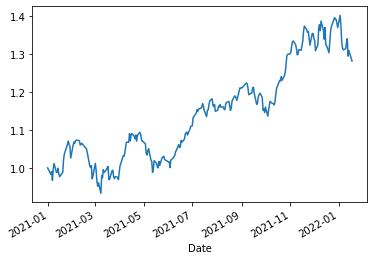

In [35]:
#analize a portfolio
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1]
#sa aurait pu etre des cryptomonnaies

data = yf.download(stocks,start='2021-01-01')
#retour journalier
x = data['Close'].pct_change()
#retour du portfolio
ret = (x*weights).sum(axis=1)
#le retour cumule total du portefeuille
cumulative = (ret+1).cumprod()
cumulative.plot()


In [37]:
#calculons la volailité du portefeuille (risqué ou non)
import numpy as np
print(np.std(ret))

0.013608000080992206


In [38]:
#calculons la volatilité annuel en % 0.2*100=20%?
annual_std = np.std(ret)*np.sqrt(252)

In [39]:
print(annual_std)

0.21602030433151312


In [40]:
#mesure du rendement ajusté au risque d'un portefeuille en %
sharpe = (np.mean(ret)/np.std(ret)*np.sqrt(252))
print(sharpe)

1.2035617037025452


In [41]:
#sharpe>1=optimal


In [42]:
#utilisation loop boucle etc...
prices = [3,5,2,8]
prod=1
p=0
for p in prices:
    prod =prod*p

In [43]:
print(prod)

240


In [44]:
#optimiser le portefeuille 
#c'est à dire le maximum de retour avec le minimun de risque
#monte-carlo simulation
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
#sa aurait pu etre des cryptomonnaies

data = yf.download(stocks,start='2021-01-01')
#retour journalier
x = data['Close']
x = data.pct_change()

[*********************100%***********************]  4 of 4 completed


In [45]:
#stocker les pondérations, les rendements et 
#les ratios de Sharpe pour chaque portefeuille que nous 
#allons vérifier afin 
#que nous puissions ensuite trouver celui qui est le meilleur.
#Nous allons définir des listes pour stocker ces valeurs pour chaque portefeuille.
p_weights = []
p_returns = []
p_risk = []
p_sharpe = [] 

In [46]:
#attribuer au hasard une pondération à chaque action de notre portef
#euille, puis calculer les mesures de ce portefeuille, y compris 
#le ratio de Sharpe.

wts = np.random.uniform(size = len(x.columns))
wts = wts/np.sum(wts)


In [47]:
print(wts)

[0.07052575 0.05707887 0.05795427 0.06499145 0.07327672 0.00640735
 0.02087544 0.02395605 0.05897432 0.01599928 0.05303864 0.03507185
 0.02571277 0.06848951 0.03669905 0.01716361 0.04098461 0.02334745
 0.04926764 0.03251984 0.06969479 0.07997806 0.00557236 0.01242032]


In [48]:
#la somme de tous sa =1
#Lors de chaque itération, nous calculons les métriques et les stockons dans les listes correspondantes à l'aide de la fonction append().
#Nous avons utilisé 500 pour optimiser le temps 
#d'exécution du code dans notre Playground. Dans d'autres scénarios, vous pourriez générer des milliers de portefeuilles, 
#pour obtenir un meilleur résultat.
count = 50000
for k in range(0, count):
   wts = np.random.uniform(size = len(x.columns))
   wts = wts/np.sum(wts)
   p_weights.append(wts)

   #returns
   mean_ret = (x.mean() * wts).sum()*252
   p_returns.append(mean_ret)

   #volatility
   ret = (x * wts).sum(axis = 1)
   annual_std = np.std(ret) * np.sqrt(252)
   p_risk.append(annual_std)
    
   #Sharpe ratio
   sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
   p_sharpe.append(sharpe)

In [49]:
max_ind = np.argmax(p_sharpe)
#max sharpe ratio
print(p_sharpe[max_ind])
#weights
print(p_weights[max_ind])

3.723580808172498
[0.08325215 0.06505217 0.07856439 0.00295096 0.02933114 0.01304688
 0.07074869 0.01872499 0.09015007 0.04403827 0.09781921 0.00627466
 0.08221759 0.06889062 0.03147599 0.02962609 0.0287125  0.00108398
 0.03652822 0.04493412 0.00987619 0.01677977 0.027029   0.02289235]


<AxesSubplot:>

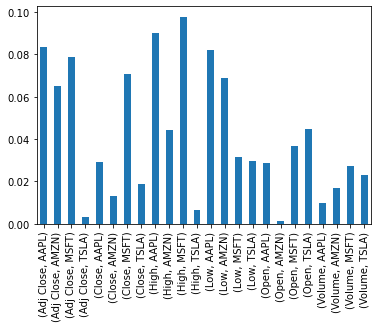

In [54]:
import pandas as pd
s = pd.Series(p_weights[max_ind],index=x.columns)
s.plot(kind="bar")

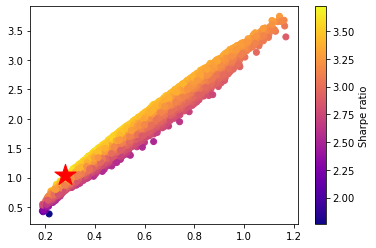

In [57]:
import matplotlib.pyplot as plt
plt.scatter(p_risk,p_returns,c=p_sharpe,cmap='plasma')
plt.colorbar(label='Sharpe ratio')
plt.scatter(p_risk[max_ind],p_returns[max_ind],color='r',marker='*',s=500)
plt.show()

In [ ]:
#a higher sharpe ratio == better investment